In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import tensorflow as tf

In [9]:
from keras.layers import Input,Dropout,Dense

In [10]:
from keras.models import Model

In [11]:
from keras import regularizers

In [12]:
from keras.utils.data_utils import get_file

In [13]:
from sklearn import metrics

In [14]:
from sklearn.svm import SVC

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [15]:
from sklearn.naive_bayes import BernoulliNB 

In [16]:
from sklearn import tree

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.feature_selection import RFE

In [21]:
import itertools

In [22]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

In [23]:
from sklearn.preprocessing import OneHotEncoder 

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

In [26]:
nrows=20000

In [27]:
df1 = pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", nrows=nrows)

In [28]:
df2=pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", nrows=nrows)

In [29]:
df3=pd.read_csv("Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv", nrows=nrows)

In [30]:
df4=pd.read_csv("Dataset/Monday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [31]:
df5=pd.read_csv("Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", nrows=nrows)

In [32]:
df6=pd.read_csv("Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", nrows=nrows)

In [33]:
df7=pd.read_csv("Dataset/Tuesday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [34]:
df8=pd.read_csv("Dataset/Wednesday-workingHours.pcap_ISCX.csv", nrows=nrows)

In [35]:
df = pd.concat([df1,df2, df3, df4,df5,df6,df7,df8])

In [36]:
del df1,df2, df3, df4,df5,df6,df7,df8

In [37]:
nRow, nCol = df.shape
print(f'Rows {nRow} Columns {nCol} ')

Rows 160000 Columns 85 


In [38]:
df = df.dropna()

In [39]:
df.columns = df.columns.str.strip()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             19997 non-null  int64  
 1   Flow Duration                19997 non-null  int64  
 2   Total Fwd Packets            19997 non-null  int64  
 3   Total Backward Packets       19997 non-null  int64  
 4   Total Length of Fwd Packets  19997 non-null  int64  
 5   Total Length of Bwd Packets  19997 non-null  int64  
 6   Fwd Packet Length Max        19997 non-null  int64  
 7   Fwd Packet Length Min        19997 non-null  int64  
 8   Fwd Packet Length Mean       19997 non-null  float64
 9   Fwd Packet Length Std        19997 non-null  float64
 10  Bwd Packet Length Max        19997 non-null  int64  
 11  Bwd Packet Length Min        19997 non-null  int64  
 12  Bwd Packet Length Mean       19997 non-null  float64
 13  Bwd Packet Lengt

In [41]:
df = df[["Destination Port", "Flow Duration", "Total Fwd Packets", 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets', 'Subflow Bwd Bytes','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward',"Label"]]

In [42]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label
0,22,1266342,41,44,2664,6954,41,2664,44,6954,243,24,32,BENIGN
1,22,1319353,41,44,2664,6954,41,2664,44,6954,243,24,32,BENIGN
2,22,160,1,1,0,0,1,0,1,0,243,0,32,BENIGN
3,22,1303488,41,42,2728,6634,41,2728,42,6634,243,24,32,BENIGN
4,35396,77,1,2,0,0,1,0,2,0,290,0,32,BENIGN


In [43]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


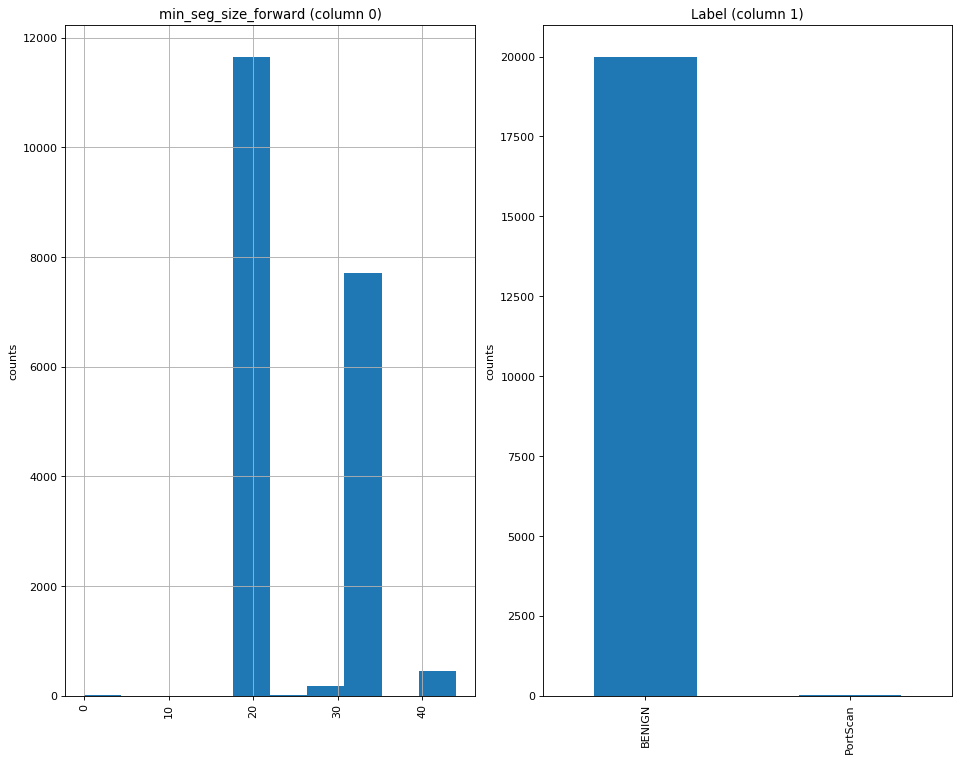

In [44]:
plotPerColumnDistribution(df, 79, 5)

In [45]:
train, test=train_test_split(df,test_size=0.3, random_state=10)

In [46]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,13997.000000,1.399700e+04,13997.000000,13997.000000,13997.000000,1.399700e+04,13997.000000,13997.000000,13997.000000,1.399700e+04,13997.000000,13997.000000,13997.000000
mean,7003.191541,1.250648e+07,7.064585,7.129528,576.093663,6.776411e+03,7.064585,576.093663,7.129528,6.776411e+03,2745.284775,4.335572,25.165964
std,17090.865097,3.199504e+07,33.380260,49.085339,3927.163084,9.063997e+04,33.380260,3927.163084,49.085339,9.063997e+04,10300.860335,25.277970,6.298175
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000
25%,53.000000,1.830000e+02,2.000000,1.000000,37.000000,6.000000e+00,2.000000,37.000000,1.000000,6.000000e+00,-1.000000,0.000000,20.000000
50%,80.000000,3.680800e+04,2.000000,2.000000,70.000000,1.440000e+02,2.000000,70.000000,2.000000,1.440000e+02,-1.000000,1.000000,20.000000
75%,443.000000,1.030024e+06,4.000000,3.000000,180.000000,3.860000e+02,4.000000,180.000000,3.000000,3.860000e+02,252.000000,3.000000,32.000000
max,64253.000000,1.199989e+08,1301.000000,2327.000000,202391.000000,4.877474e+06,1301.000000,202391.000000,2327.000000,4.877474e+06,65535.000000,1134.000000,44.000000


In [47]:
test.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000
mean,6912.188500,1.194322e+07,7.144167,7.522000,598.150333,7.531619e+03,7.144167,598.150333,7.522000,7.531619e+03,2634.510167,4.558000,25.067333
std,16993.709391,3.151548e+07,40.898812,61.763295,4379.581840,1.098126e+05,40.898812,4379.581840,61.763295,1.098126e+05,10074.539708,35.224789,6.291216
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000
25%,53.000000,1.820000e+02,2.000000,1.000000,37.000000,6.000000e+00,2.000000,37.000000,1.000000,6.000000e+00,-1.000000,0.000000,20.000000
50%,80.000000,3.122250e+04,2.000000,2.000000,68.000000,1.400000e+02,2.000000,68.000000,2.000000,1.400000e+02,-1.000000,1.000000,20.000000
75%,443.000000,4.530348e+05,4.000000,2.000000,156.000000,3.480000e+02,4.000000,156.000000,2.000000,3.480000e+02,243.000000,3.000000,32.000000
max,62465.000000,1.199981e+08,1799.000000,2792.000000,232349.000000,5.074075e+06,1799.000000,232349.000000,2792.000000,5.074075e+06,65535.000000,1798.000000,44.000000


In [48]:
train['Label'].value_counts()
test['Label'].value_counts()

BENIGN    6000
Name: Label, dtype: int64

In [49]:
scaler = StandardScaler()

In [50]:
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

In [51]:
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [52]:
onehotencoder = OneHotEncoder() 

In [53]:
trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [54]:
train_X=sc_traindf
train_y=trainDep[:,0]

In [55]:
test_X=sc_testdf
test_y=testDep[:,0]

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(train_X, train_y)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

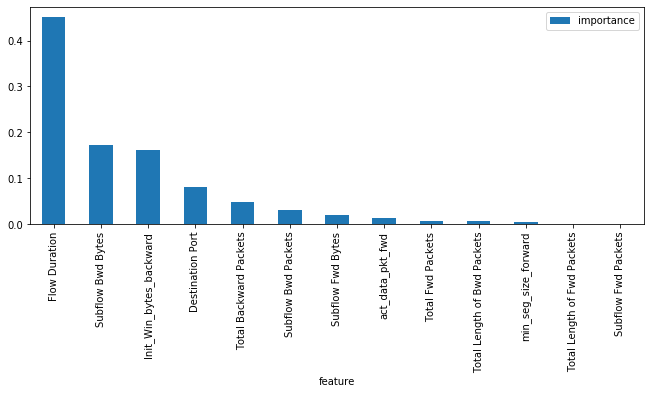

In [59]:
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [60]:
rfc = RandomForestClassifier()

In [61]:
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(train_X, train_y)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:167: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.bool)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:168: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guid

In [62]:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]

In [63]:
selected_features = [v for i, v in feature_map if i==True]

In [64]:
selected_features

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward']

In [65]:
a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

In [67]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [68]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [69]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [71]:
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

In [72]:
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarni


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994900039526513

Model Accuracy:
 0.999489639685618

Confusion matrix:
 [[   0    5]
 [   0 9792]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       1.00      1.00      1.00      9792

    accuracy                           1.00      9797
   macro avg       0.50      0.50      0.50      9797
weighted avg       1.00      1.00      1.00      9797



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994898997230125

Model Accuracy:
 1.0

Confusion matrix:
 [[   5    0]
 [   0 9792]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00      9792


C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch


============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994900039526513

Model Accuracy:
 0.9997958558742472

Confusion matrix:
 [[   3    2]
 [   0 9792]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       1.00      1.00      1.00      9792

    accuracy                           1.00      9797
   macro avg       1.00      0.80      0.87      9797
weighted avg       1.00      1.00      1.00      9797




C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarni


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994900039526513

Model Accuracy:
 0.999489639685618

Confusion matrix:
 [[   0    5]
 [   0 9792]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       1.00      1.00      1.00      9792

    accuracy                           1.00      9797
   macro avg       0.50      0.50      0.50      9797
weighted avg       1.00      1.00      1.00      9797




In [73]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9995238095238095

Confusion matrix:
 [[   0    2]
 [   0 4198]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       1.00      1.00      1.00      4198

    accuracy                           1.00      4200
   macro avg       0.50      0.50      0.50      4200
weighted avg       1.00      1.00      1.00      4200



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 1.0

Confusion matrix:
 [[   2    0]
 [   0 4198]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00      4198

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9992857142857143

Confusion matrix:
 [[   0    2]
 [   1 4197]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       1.00      1.00      1.00      4198

    accuracy                           1.00      4200
   macro avg       0.50      0.50      0.50      4200
weighted avg       1.00      1.00      1.00      4200



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9995238095238095

Confusion matrix:
 [[   0    2]
 [   0 4198]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       1.00      1.00      1.00      4198

    accuracy                           1.00      4200
   macro avg       0.50      0.5

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [74]:
def getModel():
    inp = Input(shape=(X_train.shape[1],))
    d1=Dropout(0.3)(inp)
    encoded = Dense(8, activation='relu', activity_regularizer=regularizers.l1(10e-5))(d1)
    decoded = Dense(X_train.shape[1], activation='relu')(encoded)
    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    return autoencoder

In [75]:
autoencoder=getModel()

In [76]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [77]:
history=autoencoder.fit(X_train, Y_train,
               epochs=32,
                batch_size=150,
                shuffle=True,
                validation_split=0.1, callbacks=[callback]
                       )

Epoch 1/32
59/59 [==============================] - 1s 5ms/step - loss: 8.5966 - accuracy: 0.0451 - val_loss: 2.3734 - val_accuracy: 0.3184
Epoch 2/32
59/59 [==============================] - 0s 1ms/step - loss: 1.6020 - accuracy: 0.5437 - val_loss: 0.6370 - val_accuracy: 0.8980
Epoch 3/32
59/59 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.8504 - val_loss: 0.3761 - val_accuracy: 0.9551
Epoch 4/32
59/59 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.9657 - val_loss: 0.1126 - val_accuracy: 0.9827
Epoch 5/32
59/59 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9807 - val_loss: 0.0674 - val_accuracy: 0.9837
Epoch 6/32
59/59 [==============================] - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9816 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 7/32
59/59 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9821 - val_loss: 0.0481 - val_accuracy: 0.9857
Epoch 8/32
59/59 [==

Text(0.5, 0, 'epoch')

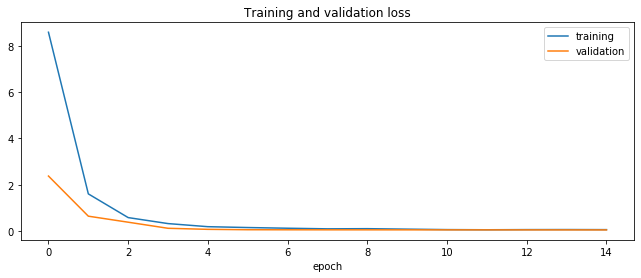

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

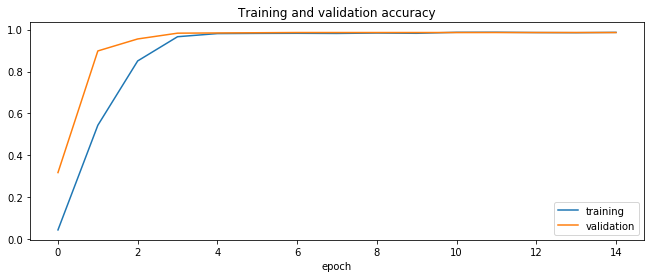

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')